# Preprocessing

In [1]:
import glob
import os
import sys
import pandas as pd
import numpy as np

## sklearn
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.utils import resample
from sklearn import preprocessing, metrics
from sklearn.model_selection import GridSearchCV

## Graphs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


columns = ['num','action', 'stage', 'dealer', 'hand_strength', 'hand_rank', 'opp_last_action',
        'my_last_action', 'my_stack_committed_curr_phase', 'opp_stack_committed_curr_phase',
        'my_num_raises_curr_phase', 'opp_num_raises_curr_phase',
        'my_num_raises_total', 'opp_num_raises_total','num_outs', 
        'winning_prob','highest_card', 'num_aces', 'num_kings', 'num_queens']

path = '../../data/hand_histories' 
all_files = glob.glob(path + "/overnight_[0-9].csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=False, names=columns, low_memory=False)
    df = df.drop(0,axis=0)
    li.append(df)

hands = pd.concat(li, axis=0)
hands = hands.fillna(0)
hands = hands[hands.action != 'target']
hands = hands.reset_index()
hands = hands.drop(['index', 'num'], axis=1)
hands

,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,opp_num_raises_total,num_outs,winning_prob,highest_card,num_aces,num_kings,num_queens
0,0,0,True,0.00345873786407767,High Card,0,0,0,0,0,0,0,0,0,40.905,0,0,0,0
1,1,0,False,0.004945388349514563,High Card,0,0,0,0.5,0,1,0,1,0,50.015,0,0,0,0
2,6,0,True,0.00345873786407767,High Card,0,1,0.5,1.0,1,1,1,1,0,40.905,0,0,0,0
3,5,0,False,0.004945388349514563,High Card,1,6,1.0,1.5,1,2,1,2,0,50.015,0,0,0,0
4,3,1,False,0.005042333510315534,High Card,5,6,0,0,0,0,2,2,12,25.200000000000003,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712836,1,0,False,0.001516990291262136,High Card,0,0,0,0.5,0,1,0,1,0,41.835,0,0,0,0
712837,6,0,True,0.0035800970873786407,High Card,0,1,0.5,1.0,1,1,1,1,0,48.305,0,0,0,0
712838,5,0,False,0.001516990291262136,High Card,1,6,1.0,1.5,1,2,1,2,0,41.835,0,0,0,0
712839,4,1,False,0.12552146541262135,Pair,5,6,0,0,0,0,2,2,8,16.8,9,0,0,0


In [2]:
hands['action'] = hands['action'].astype(int)
hands['dealer'] = hands['dealer'] * 1
hands = hands[(hands.action == 2)| (hands.action == 3) | (hands.action == 4) | (hands.action == 5) | (hands.action == 6)] ## remove all actions that are not check, call, bet, or fold: (all non-mandatory actions) 
hand_ranks={
    'High Card':0,
    'Pair':1,
    'Two Pair':2,
    'Trips':3,
    'Straight':4,
    'Flush': 5,
    'Full House': 6,
    'Quads': 7,
    'Straight Flush': 8
}

action_types = {
    2: 0,
    3: 1,
    5: 1,
    4: 2,
    6: 2
}

bools = {
    'True': True,
    'False': False
}

hands['dealer'] = hands['dealer'].map(bools)
hands['hand_rank'] = hands['hand_rank'].map(hand_ranks)
hands['action'] = hands['action'].map(action_types)
hands

/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,opp_num_raises_total,num_outs,winning_prob,highest_card,num_aces,num_kings,num_queens
2,2,0,True,0.00345873786407767,0,0,1,0.5,1.0,1,1,1,1,0,40.905,0,0,0,0
3,1,0,False,0.004945388349514563,0,1,6,1.0,1.5,1,2,1,2,0,50.015,0,0,0,0
4,1,1,False,0.005042333510315534,0,5,6,0,0,0,0,2,2,12,25.200000000000003,6,0,0,0
5,2,1,True,0.1254664745145631,1,6,3,0,0,0,0,2,2,8,16.8,6,0,0,0
6,0,1,False,0.005042333510315534,0,3,4,0,1.0,0,1.0,2,3.0,12,25.200000000000003,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712834,0,0,True,0.005825242718446602,0,0,1,0.5,1.0,1,1,1,1,0,54.690000000000005,0,0,0,0
712837,2,0,True,0.0035800970873786407,0,0,1,0.5,1.0,1,1,1,1,0,48.305,0,0,0,0
712838,1,0,False,0.001516990291262136,0,1,6,1.0,1.5,1,2,1,2,0,41.835,0,0,0,0
712839,2,1,False,0.12552146541262135,1,5,6,0,0,0,0,2,2,8,16.8,9,0,0,0


In [3]:
hands = hands.astype({'action': 'int32','stage': 'int32','dealer': 'bool','hand_strength': 'float','hand_rank': 'object',
             'opp_last_action': 'int32','my_last_action': 'int32','my_stack_committed_curr_phase': 'float','opp_stack_committed_curr_phase': 'float',
              'my_num_raises_curr_phase': 'float','opp_num_raises_curr_phase': 'float', 'my_num_raises_total': 'float',
             'opp_num_raises_total': 'float', 'num_outs': 'int32', 'winning_prob': 'float','highest_card': 'int32',
             'num_aces': 'int32','num_kings': 'int32','num_queens': 'int32'})

In [4]:
hands

,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,opp_num_raises_total,num_outs,winning_prob,highest_card,num_aces,num_kings,num_queens
2,2,0,True,0.003459,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,40.905,0,0,0,0
3,1,0,False,0.004945,0,1,6,1.0,1.5,1.0,2.0,1.0,2.0,0,50.015,0,0,0,0
4,1,1,False,0.005042,0,5,6,0.0,0.0,0.0,0.0,2.0,2.0,12,25.200,6,0,0,0
5,2,1,True,0.125466,1,6,3,0.0,0.0,0.0,0.0,2.0,2.0,8,16.800,6,0,0,0
6,0,1,False,0.005042,0,3,4,0.0,1.0,0.0,1.0,2.0,3.0,12,25.200,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712834,0,0,True,0.005825,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,54.690,0,0,0,0
712837,2,0,True,0.003580,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,48.305,0,0,0,0
712838,1,0,False,0.001517,0,1,6,1.0,1.5,1.0,2.0,1.0,2.0,0,41.835,0,0,0,0
712839,2,1,False,0.125521,1,5,6,0.0,0.0,0.0,0.0,2.0,2.0,8,16.800,9,0,0,0


# Charts

In [5]:
print(hands.columns)
hands.head(5)

Index(['action', 'stage', 'dealer', 'hand_strength', 'hand_rank',
       'opp_last_action', 'my_last_action', 'my_stack_committed_curr_phase',
       'opp_stack_committed_curr_phase', 'my_num_raises_curr_phase',
       'opp_num_raises_curr_phase', 'my_num_raises_total',
       'opp_num_raises_total', 'num_outs', 'winning_prob', 'highest_card',
       'num_aces', 'num_kings', 'num_queens'],
      dtype='object')


,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,opp_num_raises_total,num_outs,winning_prob,highest_card,num_aces,num_kings,num_queens
2,2,0,True,0.003459,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,40.905,0,0,0,0
3,1,0,False,0.004945,0,1,6,1.0,1.5,1.0,2.0,1.0,2.0,0,50.015,0,0,0,0
4,1,1,False,0.005042,0,5,6,0.0,0.0,0.0,0.0,2.0,2.0,12,25.200,6,0,0,0
5,2,1,True,0.125466,1,6,3,0.0,0.0,0.0,0.0,2.0,2.0,8,16.800,6,0,0,0
6,0,1,False,0.005042,0,3,4,0.0,1.0,0.0,1.0,2.0,3.0,12,25.200,6,0,0,0


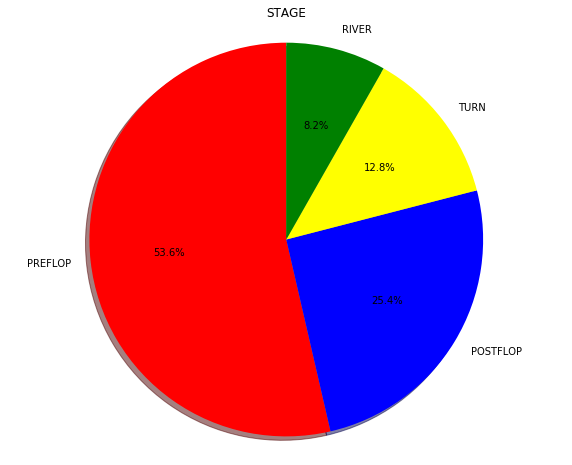

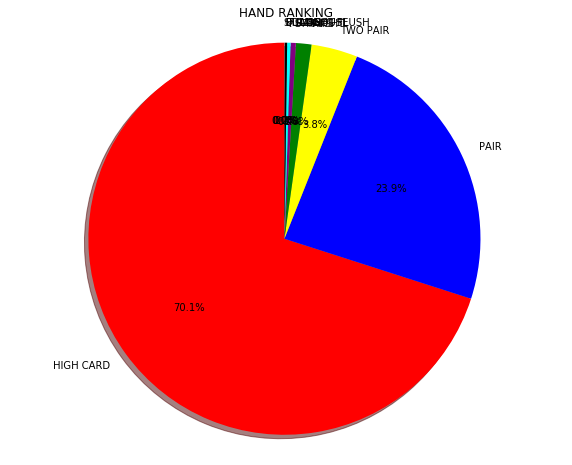

In [6]:
labels = ['PREFLOP', 'POSTFLOP', 'TURN', 'RIVER']
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10, 8)
ax1.pie(hands.groupby('stage').count()['dealer'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['red', 'blue', 'yellow', 'green'])
ax1.axis('equal')
plt.title('STAGE')

plt.show()


labels = ['HIGH CARD','PAIR', 'TWO PAIR', 'TRIPS', 'STRAIGHT', 'FLUSH', 'FULL HOUSE', 'QUADS', 'STRAIGHT FLUSH']
fig2, ax2 = plt.subplots()
fig2.set_size_inches(10, 8)
ax2.pie(hands.groupby('hand_rank').count()['dealer'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['red', 'blue', 'yellow', 'green', 'purple', 'cyan', 'black', 'gray', 'orange'])
ax2.axis('equal')
plt.title('HAND RANKING')

plt.show()

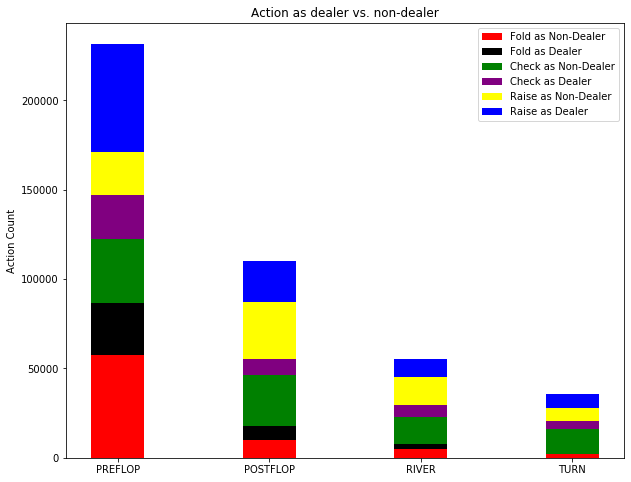

In [7]:
preflop = hands[(hands.stage==0)]
postflop = hands[(hands.stage==1)]
turn = hands[(hands.stage==2)]
river = hands[(hands.stage==3)]
nd_fold = [len(preflop[(preflop.dealer==False) & (preflop.action==0)]), len(postflop[(postflop.dealer==False) & (postflop.action==0)]), len(turn[(turn.dealer==False) & (turn.action==0)]), len(river[(river.dealer==False) & (river.action==0)])]
d_fold = [len(preflop[(preflop.dealer==True) & (preflop.action==0)]), len(postflop[(postflop.dealer==True) & (postflop.action==0)]), len(turn[(turn.dealer==True) & (turn.action==0)]), len(river[(river.dealer==True) & (river.action==0)])]
nd_check = [len(preflop[(preflop.dealer==False) & (preflop.action==1)]), len(postflop[(postflop.dealer==False) & (postflop.action==1)]), len(turn[(turn.dealer==False) & (turn.action==1)]), len(river[(river.dealer==False) & (river.action==1)])]
d_check = [len(preflop[(preflop.dealer==True) & (preflop.action==1)]), len(postflop[(postflop.dealer==True) & (postflop.action==1)]), len(turn[(turn.dealer==True) & (turn.action==1)]), len(river[(river.dealer==True) & (river.action==1)])]
nd_raise = [len(preflop[(preflop.dealer==False) & (preflop.action==2)]), len(postflop[(postflop.dealer==False) & (postflop.action==2)]), len(turn[(turn.dealer==False) & (turn.action==2)]), len(river[(river.dealer==False) & (river.action==2)])]
d_raise = [len(preflop[(preflop.dealer==True) & (preflop.action==2)]), len(postflop[(postflop.dealer==True) & (postflop.action==2)]), len(turn[(turn.dealer==True) & (turn.action==2)]), len(river[(river.dealer==True) & (river.action==2)])]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
curr = [0,0,0,0]
labels=['PREFLOP', 'POSTFLOP', 'RIVER', 'TURN']
ax.bar(labels, nd_fold, width, color='red', label='Fold as Non-Dealer')
curr = np.add(curr, nd_fold)
ax.bar(labels, d_fold, width, bottom=curr, color='black',  label='Fold as Dealer')
curr = np.add(curr, d_fold)
ax.bar(labels, nd_check, width, bottom=curr, color='green',  label='Check as Non-Dealer')
curr = np.add(curr, nd_check)
ax.bar(labels, d_check, width, bottom=curr, color='purple', label='Check as Dealer')
curr = np.add(curr, d_check)
ax.bar(labels, nd_raise, width, bottom=curr, color='yellow', label='Raise as Non-Dealer')
curr = np.add(curr, nd_raise)
ax.bar(labels, d_raise, width, bottom=curr, color='blue', label='Raise as Dealer')

ax.set_ylabel('Action Count')
ax.set_title('Action as dealer vs. non-dealer')
ax.legend()

plt.show()



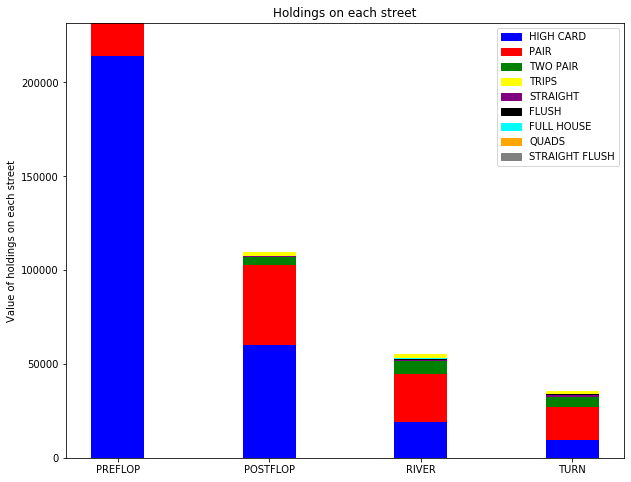

In [8]:
colors_i = { 0: 'blue', 1:'red', 2:'green',
             3: 'yellow', 4:'purple', 5:'black',
             6: 'cyan', 7:'orange', 8:'gray'} 
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
prev = [0,0,0,0]
for rank in hands['hand_rank'].unique():
    curr =[len(preflop[(preflop.hand_rank == rank)]), len(postflop[(postflop.hand_rank == rank)]), len(turn[(turn.hand_rank == rank)]), len(river[(river.hand_rank == rank)])]
    ax.bar(labels, curr, width, bottom=prev, color=colors_i[rank],  label='%d'%rank)
    prev = np.add(curr, prev)
    

blue_patch = mpatches.Patch(color='blue', label='HIGH CARD')
red_patch = mpatches.Patch(color='red', label='PAIR')
green_patch = mpatches.Patch(color='green', label='TWO PAIR')
yellow_patch = mpatches.Patch(color='yellow', label='TRIPS')
purple_patch = mpatches.Patch(color='purple', label='STRAIGHT')
black_patch = mpatches.Patch(color='black', label='FLUSH')
cyan_patch = mpatches.Patch(color='cyan', label='FULL HOUSE')
orange_patch = mpatches.Patch(color='orange', label='QUADS')
gray_patch = mpatches.Patch(color='gray', label='STRAIGHT FLUSH')

ax.set_ylabel('Value of holdings on each street')
ax.set_title('Holdings on each street')
plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch, purple_patch, black_patch, cyan_patch, orange_patch, gray_patch])
plt.show()
    

# Feature Extraction

In [9]:
hands['dealer'] = hands['dealer'] * 1
hands

,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,opp_num_raises_total,num_outs,winning_prob,highest_card,num_aces,num_kings,num_queens
2,2,0,1,0.003459,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,40.905,0,0,0,0
3,1,0,0,0.004945,0,1,6,1.0,1.5,1.0,2.0,1.0,2.0,0,50.015,0,0,0,0
4,1,1,0,0.005042,0,5,6,0.0,0.0,0.0,0.0,2.0,2.0,12,25.200,6,0,0,0
5,2,1,1,0.125466,1,6,3,0.0,0.0,0.0,0.0,2.0,2.0,8,16.800,6,0,0,0
6,0,1,0,0.005042,0,3,4,0.0,1.0,0.0,1.0,2.0,3.0,12,25.200,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712834,0,0,1,0.005825,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,54.690,0,0,0,0
712837,2,0,1,0.003580,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,48.305,0,0,0,0
712838,1,0,0,0.001517,0,1,6,1.0,1.5,1.0,2.0,1.0,2.0,0,41.835,0,0,0,0
712839,2,1,0,0.125521,1,5,6,0.0,0.0,0.0,0.0,2.0,2.0,8,16.800,9,0,0,0


In [10]:
dealer_action = hands[(hands.dealer == 1)]
blind_action = hands[(hands.dealer == 0)]

In [11]:

prev_dealer_action = dealer_action.drop([max(dealer_action.index)])
dealer_action = dealer_action.drop([min(dealer_action.index)])
prev_dealer_action = prev_dealer_action.rename(columns={'num': 'prev_num', 'action': 'prev_action','stage': 'prev_stage','dealer': 'prev_dealer','hand_strength': 'prev_hand_strength','hand_rank': 'prev_hand_rank',
             'opp_last_action': 'prev_opp_last_action','my_last_action': 'prev_my_last_action','my_stack_committed_curr_phase': 'prev_my_stack_committed_curr_phase','opp_stack_committed_curr_phase': 'prev_opp_stack_committed_curr_phase',
              'my_num_raises_curr_phase': 'prev_my_num_raises_curr_phase','opp_num_raises_curr_phase': 'prev_opp_num_raises_curr_phase', 'my_num_raises_total': 'prev_my_num_raises_total',
             'opp_num_raises_total': 'prev_opp_num_raises_total', 'num_outs': 'prev_num_outs', 'winning_prob': 'prev_winning_prob','highest_card': 'prev_highest_card',
             'num_aces': 'prev_num_aces','num_kings': 'prev_num_kings','num_queens': 'prev_num_queens'})

prev_blind_action = blind_action.drop([max(blind_action.index)])
blind_action = blind_action.drop([min(blind_action.index)])
prev_blind_action = prev_blind_action.rename(columns={'num': 'prev_num', 'action': 'prev_action','stage': 'prev_stage','dealer': 'prev_dealer','hand_strength': 'prev_hand_strength','hand_rank': 'prev_hand_rank',
             'opp_last_action': 'prev_opp_last_action','my_last_action': 'prev_my_last_action','my_stack_committed_curr_phase': 'prev_my_stack_committed_curr_phase','opp_stack_committed_curr_phase': 'prev_opp_stack_committed_curr_phase',
              'my_num_raises_curr_phase': 'prev_my_num_raises_curr_phase','opp_num_raises_curr_phase': 'prev_opp_num_raises_curr_phase', 'my_num_raises_total': 'prev_my_num_raises_total',
             'opp_num_raises_total': 'prev_opp_num_raises_total', 'num_outs': 'prev_num_outs', 'winning_prob': 'prev_winning_prob','highest_card': 'prev_highest_card',
             'num_aces': 'prev_num_aces','num_kings': 'prev_num_kings','num_queens': 'prev_num_queens'})


In [12]:
prev_dealer_action

,prev_action,prev_stage,prev_dealer,prev_hand_strength,prev_hand_rank,prev_opp_last_action,prev_my_last_action,prev_my_stack_committed_curr_phase,prev_opp_stack_committed_curr_phase,prev_my_num_raises_curr_phase,prev_opp_num_raises_curr_phase,prev_my_num_raises_total,prev_opp_num_raises_total,prev_num_outs,prev_winning_prob,prev_highest_card,prev_num_aces,prev_num_kings,prev_num_queens
2,2,0,1,0.003459,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,40.905,0,0,0,0
5,2,1,1,0.125466,1,6,3,0.0,0.0,0.0,0.0,2.0,2.0,8,16.800,6,0,0,0
9,0,0,1,0.001001,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,35.555,0,0,0,0
12,1,0,1,0.004885,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,50.935,0,0,0,0
15,1,1,1,0.005143,0,5,4,0.0,1.0,0.0,1.0,2.0,3.0,15,31.500,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712823,1,2,1,0.125109,1,6,6,4.0,4.0,4.0,4.0,7.0,7.0,14,29.400,11,0,0,0
712825,2,3,1,0.125109,1,5,3,0.0,0.0,0.0,0.0,9.0,7.0,14,29.400,11,0,0,0
712827,2,3,1,0.125109,1,4,6,2.0,2.0,2.0,2.0,11.0,9.0,14,29.400,11,0,0,0
712834,0,0,1,0.005825,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,54.690,0,0,0,0


In [13]:
prev_blind_action

,prev_action,prev_stage,prev_dealer,prev_hand_strength,prev_hand_rank,prev_opp_last_action,prev_my_last_action,prev_my_stack_committed_curr_phase,prev_opp_stack_committed_curr_phase,prev_my_num_raises_curr_phase,prev_opp_num_raises_curr_phase,prev_my_num_raises_total,prev_opp_num_raises_total,prev_num_outs,prev_winning_prob,prev_highest_card,prev_num_aces,prev_num_kings,prev_num_queens
3,1,0,0,0.004945,0,1,6,1.0,1.5,1.0,2.0,1.0,2.0,0,50.015,0,0,0,0
4,1,1,0,0.005042,0,5,6,0.0,0.0,0.0,0.0,2.0,2.0,12,25.200,6,0,0,0
6,0,1,0,0.005042,0,3,4,0.0,1.0,0.0,1.0,2.0,3.0,12,25.200,6,0,0,0
13,1,0,0,0.005036,0,1,5,1.0,1.0,1.0,2.0,1.0,2.0,0,55.900,0,0,0,0
14,2,1,0,0.005143,0,3,5,0.0,0.0,0.0,0.0,2.0,2.0,19,39.900,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712822,2,2,0,0.128990,1,6,6,2.0,4.0,2.0,4.0,5.0,7.0,14,29.400,11,0,0,0
712824,1,3,0,0.128990,1,6,5,0.0,0.0,0.0,0.0,7.0,9.0,14,29.400,11,0,0,0
712826,2,3,0,0.128990,1,3,4,0.0,2.0,0.0,2.0,7.0,11.0,14,29.400,11,0,0,0
712828,1,3,0,0.128990,1,6,6,2.0,4.0,2.0,4.0,9.0,13.0,14,29.400,11,0,0,0


In [14]:
for col in prev_blind_action.columns:
    blind_action[col] = prev_blind_action[col].values

for col in prev_dealer_action.columns:
    dealer_action[col] = prev_dealer_action[col].values

In [15]:
features = pd.concat([dealer_action, blind_action], axis=0).reset_index()
features = features.drop(['index'], axis=1)
features

,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,...,prev_my_num_raises_curr_phase,prev_opp_num_raises_curr_phase,prev_my_num_raises_total,prev_opp_num_raises_total,prev_num_outs,prev_winning_prob,prev_highest_card,prev_num_aces,prev_num_kings,prev_num_queens
0,2,1,1,0.125466,1,6,3,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0,40.905,0,0,0,0
1,0,0,1,0.001001,0,0,1,0.5,1.0,1.0,...,0.0,0.0,2.0,2.0,8,16.800,6,0,0,0
2,1,0,1,0.004885,0,0,1,0.5,1.0,1.0,...,1.0,1.0,1.0,1.0,0,35.555,0,0,0,0
3,1,1,1,0.005143,0,5,4,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0,50.935,0,0,0,0
4,2,2,1,0.005143,0,5,3,0.0,0.0,0.0,...,0.0,1.0,2.0,3.0,15,31.500,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432243,1,3,0,0.128990,1,6,5,0.0,0.0,0.0,...,2.0,4.0,5.0,7.0,14,29.400,11,0,0,0
432244,2,3,0,0.128990,1,3,4,0.0,2.0,0.0,...,0.0,0.0,7.0,9.0,14,29.400,11,0,0,0
432245,1,3,0,0.128990,1,6,6,2.0,4.0,2.0,...,0.0,2.0,7.0,11.0,14,29.400,11,0,0,0
432246,1,0,0,0.001517,0,1,6,1.0,1.5,1.0,...,2.0,4.0,9.0,13.0,14,29.400,11,0,0,0


In [16]:
features.dtypes

action                                   int32
stage                                    int32
dealer                                   int64
hand_strength                          float64
hand_rank                               object
opp_last_action                          int32
my_last_action                           int32
my_stack_committed_curr_phase          float64
opp_stack_committed_curr_phase         float64
my_num_raises_curr_phase               float64
opp_num_raises_curr_phase              float64
my_num_raises_total                    float64
opp_num_raises_total                   float64
num_outs                                 int32
winning_prob                           float64
highest_card                             int32
num_aces                                 int32
num_kings                                int32
num_queens                               int32
prev_action                              int32
prev_stage                               int32
prev_dealer  

## extraction for hand rank model

In [17]:

nut_ranks={
    0:0,
    1:1,
    2:2,
    3:3,
    4:4,
    5: 5,
    6: 6,
    7: 6,
    8: 6
}
features['hand_rank'] = features['hand_rank'].map(nut_ranks)
features['prev_hand_rank'] = features['prev_hand_rank'].map(nut_ranks)
features['hand_rank'].value_counts()

0    302796
1    103422
2     16455
3      5531
4      1883
5      1205
6       956
Name: hand_rank, dtype: int64

In [18]:
high_card = features[(features.hand_rank == 0)]
pair = features[(features.hand_rank == 1)]
two_pair = features[(features.hand_rank == 2)]
trips = features[(features.hand_rank == 3)]
straight = features[(features.hand_rank == 4)]
flush = features[(features.hand_rank == 5)]
nuts = features[(features.hand_rank == 6)]

hand_ranks = [high_card, pair, two_pair, trips, straight, flush, nuts]

In [19]:

resampled = []
for hand_rank in hand_ranks:
    new = resample(hand_rank, replace=(10000 - len(hand_rank) > 0), n_samples=10000, random_state=999)
    resampled.append(new)

features_hand_rank = pd.concat(resampled, axis=0)
target_hand_rank = features_hand_rank['hand_rank']
features_hand_rank = features_hand_rank.drop(['hand_rank', 'prev_hand_rank', 'hand_strength', 'prev_hand_strength', 'winning_prob', 'prev_winning_prob', 'num_outs', 'prev_num_outs'], axis=1)


In [20]:
features_hand_rank

,action,stage,dealer,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,...,prev_my_stack_committed_curr_phase,prev_opp_stack_committed_curr_phase,prev_my_num_raises_curr_phase,prev_opp_num_raises_curr_phase,prev_my_num_raises_total,prev_opp_num_raises_total,prev_highest_card,prev_num_aces,prev_num_kings,prev_num_queens
400582,1,0,0,6,6,2.0,2.5,2.0,3.0,2.0,...,1.0,1.5,1.0,2.0,1.0,2.0,0,0,0,0
202290,1,1,0,5,6,0.0,0.0,0.0,0.0,3.0,...,2.0,2.5,2.0,3.0,2.0,3.0,0,0,0,0
27731,1,0,1,5,4,1.0,2.0,2.0,2.0,2.0,...,0.5,1.0,1.0,1.0,1.0,1.0,0,0,0,0
2968,1,0,1,0,1,0.5,1.0,1.0,1.0,1.0,...,0.5,1.0,1.0,1.0,1.0,1.0,0,0,0,0
290268,2,1,0,5,6,0.0,0.0,0.0,0.0,2.0,...,1.0,1.5,1.0,2.0,1.0,2.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272455,1,2,0,3,4,0.0,2.0,0.0,2.0,4.0,...,0.0,0.0,0.0,0.0,4.0,4.0,12,1,0,2
142668,1,1,1,5,4,0.0,1.0,0.0,1.0,3.0,...,1.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0
64138,1,3,1,5,4,0.0,2.0,0.0,2.0,8.0,...,2.0,4.0,2.0,4.0,6.0,7.0,11,0,1,3
364875,1,2,0,5,6,0.0,0.0,0.0,0.0,5.0,...,2.0,2.0,2.0,2.0,4.0,5.0,9,0,0,0


In [21]:
target_hand_rank.value_counts()

6    10000
5    10000
4    10000
3    10000
2    10000
1    10000
0    10000
Name: hand_rank, dtype: int64

## extraction for action based model

In [22]:
features_action = resample(features, replace=False, n_samples=70000, random_state=999)
target_action = features_action['action']
features_action = features_action.drop(['action'], axis=1)
features_action

,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,...,prev_my_num_raises_curr_phase,prev_opp_num_raises_curr_phase,prev_my_num_raises_total,prev_opp_num_raises_total,prev_num_outs,prev_winning_prob,prev_highest_card,prev_num_aces,prev_num_kings,prev_num_queens
308498,2,0,0.373007,3,4,5,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,11,23.100,6,0,0,0
155705,0,1,0.004854,0,0,1,0.5,1.0,1.0,1.0,...,1.0,2.0,4.0,4.0,8,16.800,9,0,0,0
326141,0,0,0.005461,0,0,1,0.5,1.0,1.0,1.0,...,0.0,0.0,2.0,2.0,8,16.800,12,0,0,0
165699,0,1,0.126699,1,0,1,0.5,1.0,1.0,1.0,...,0.0,1.0,3.0,4.0,8,16.800,6,0,0,0
328275,0,0,0.124272,1,1,5,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,0,37.790,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42892,0,1,0.002913,0,0,1,0.5,1.0,1.0,1.0,...,0.0,2.0,6.0,7.0,14,29.400,6,0,0,0
332453,0,0,0.004066,0,1,5,1.0,1.0,1.0,2.0,...,1.0,2.0,1.0,2.0,0,48.950,0,0,0,0
344833,1,0,0.127040,1,5,6,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,2.0,0,45.525,0,0,0,0
358052,0,0,0.004490,0,0,1,0.5,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,0,48.245,0,0,0,0


In [23]:
target_action

308498    2
155705    2
326141    0
165699    2
328275    2
         ..
42892     0
332453    2
344833    2
358052    0
325047    0
Name: action, Length: 70000, dtype: int32

## Feature selection action

In [24]:
X_train_action, X_test_action, y_train_action, y_test_action = train_test_split(features_action, target_action, random_state=999) 

feature_selection_tree_action = ExtraTreesClassifier(n_estimators=20)
feature_selection_tree_action.fit(X_train_action, y_train_action)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [25]:
print(feature_selection_tree_action.feature_importances_)

accuracy = feature_selection_tree_action.score(X_test_action, y_test_action)
error = 1-accuracy
print("Accuracy=",accuracy)
print("Error=",error)

predictions = feature_selection_tree_action.predict(X_test_action)
print()
print(classification_report(y_test_action, predictions, target_names=['fold', 'check', 'raise']))

[0.00890452 0.01713663 0.12859393 0.02171645 0.03836197 0.03649537
 0.01116336 0.0461084  0.00856619 0.02584087 0.01129628 0.019386
 0.03078577 0.12729723 0.03551938 0.00631458 0.00621786 0.00623813
 0.04499628 0.0083266  0.02085655 0.09761564 0.00941573 0.01922483
 0.01550334 0.00339925 0.00726728 0.00430747 0.00816327 0.016044
 0.01938882 0.01698834 0.07362234 0.02967244 0.00614166 0.00646609
 0.00665716]
Accuracy= 0.7337142857142858
Error= 0.26628571428571424

              precision    recall  f1-score   support

        fold       0.79      0.86      0.82      4590
       check       0.69      0.66      0.67      5657
       raise       0.73      0.71      0.72      7253

    accuracy                           0.73     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.73      0.73      0.73     17500



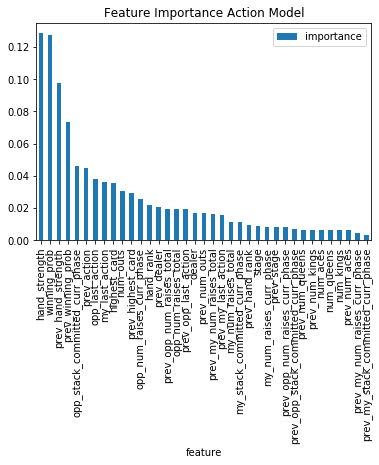

In [26]:
features_importance_list_action = []
for feature, importance in sorted(zip(X_test_action.columns, feature_selection_tree_action.feature_importances_), key=lambda x: x[1], reverse=True):
    features_importance_list_action.append(feature)

df = pd.DataFrame(sorted(zip(X_test_action.columns, feature_selection_tree_action.feature_importances_), key=lambda x: x[1], reverse=True), columns=['feature', 'importance'])
df.plot(kind='bar', x='feature', title='Feature Importance Action Model')

In [27]:
selected_features_action = features_action.drop(features_importance_list_action[20:], axis=1)
selected_features_action

,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,opp_stack_committed_curr_phase,opp_num_raises_curr_phase,opp_num_raises_total,num_outs,winning_prob,highest_card,prev_action,prev_dealer,prev_hand_strength,prev_opp_last_action,prev_my_num_raises_total,prev_opp_num_raises_total,prev_num_outs,prev_winning_prob,prev_highest_card
308498,0,0.373007,3,4,5,0.0,0.0,4.0,10,21.000,6,2,0,0.124464,4,2.0,3.0,11,23.100,6
155705,1,0.004854,0,0,1,1.0,1.0,1.0,0,47.210,0,2,1,0.130418,6,4.0,4.0,8,16.800,9
326141,0,0.005461,0,0,1,1.0,1.0,1.0,0,53.840,0,2,0,0.130416,5,2.0,2.0,8,16.800,12
165699,1,0.126699,1,0,1,1.0,1.0,1.0,0,66.240,0,0,1,0.126399,6,3.0,4.0,8,16.800,6
328275,0,0.124272,1,1,5,1.0,2.0,2.0,0,50.365,0,0,0,0.002943,0,1.0,1.0,0,37.790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42892,1,0.002913,0,0,1,1.0,1.0,1.0,0,37.145,0,1,1,0.125014,4,6.0,7.0,14,29.400,6
332453,0,0.004066,0,1,5,1.0,2.0,2.0,0,49.830,0,0,0,0.004005,1,1.0,2.0,0,48.950,0
344833,0,0.127040,1,5,6,0.0,0.0,2.0,8,16.800,11,1,0,0.002549,1,1.0,2.0,0,45.525,0
358052,0,0.004490,0,0,1,1.0,1.0,1.0,0,47.745,0,0,0,0.004399,1,1.0,2.0,0,48.245,0


## Selection Hand Model

In [28]:
X_train_hand_rank, X_test_hand_rank, y_train_hand_rank, y_test_hand_rank = train_test_split(features_hand_rank, target_hand_rank, random_state=999) 

feature_selection_tree = ExtraTreesClassifier(n_estimators=20)
feature_selection_tree.fit(X_train_hand_rank, y_train_hand_rank)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [29]:
print(feature_selection_tree.feature_importances_)

accuracy = feature_selection_tree.score(X_test_hand_rank, y_test_hand_rank)
error = 1-accuracy
print("Accuracy=",accuracy)
print("Error=",error)

predictions = feature_selection_tree.predict(X_test_hand_rank)
print()
print(classification_report(y_test_hand_rank, predictions, target_names=['High Card', 'Pair', 'Two Pair', 'Trips', 'Straight', 'Full House', 'Nuts']))

[0.06883452 0.03095559 0.00962036 0.04336132 0.01431194 0.01598824
 0.01282994 0.01642343 0.00920906 0.05594713 0.04884956 0.17538769
 0.02485602 0.02494637 0.02692149 0.01707798 0.01435626 0.00989716
 0.03812932 0.02232468 0.0075138  0.00883743 0.00588929 0.00868468
 0.04825178 0.04513382 0.14025908 0.01884327 0.01783907 0.01851972]
Accuracy= 0.6404571428571428
Error= 0.35954285714285716

              precision    recall  f1-score   support

   High Card       0.74      0.74      0.74      2550
        Pair       0.33      0.29      0.31      2466
    Two Pair       0.46      0.32      0.38      2534
       Trips       0.57      0.56      0.57      2543
    Straight       0.72      0.79      0.76      2512
  Full House       0.72      0.87      0.79      2430
        Nuts       0.79      0.92      0.85      2465

    accuracy                           0.64     17500
   macro avg       0.62      0.64      0.63     17500
weighted avg       0.62      0.64      0.63     17500



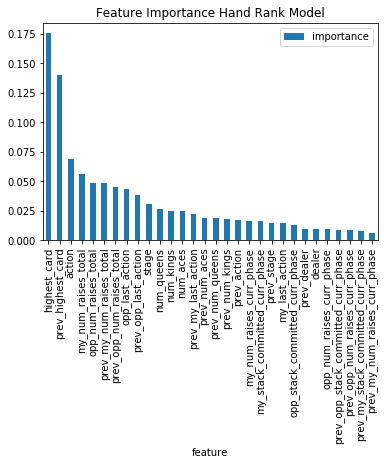

In [30]:
features_importance_list_hand_rank = []
for feature, importance in sorted(zip(X_test_hand_rank.columns, feature_selection_tree.feature_importances_), key=lambda x: x[1], reverse=True):
    features_importance_list_hand_rank.append(feature)

df = pd.DataFrame(sorted(zip(X_test_hand_rank.columns, feature_selection_tree.feature_importances_), key=lambda x: x[1], reverse=True), columns=['feature', 'importance'])
df.plot(kind='bar', x='feature', title='Feature Importance Hand Rank Model')

In [31]:
selected_features_hand_rank = features_hand_rank.drop(features_importance_list_hand_rank[17:], axis=1)
selected_features_hand_rank = selected_features_hand_rank.drop(['highest_card', 'prev_highest_card', 'action'], axis=1)
selected_features_hand_rank

,stage,opp_last_action,my_num_raises_total,opp_num_raises_total,num_aces,num_kings,num_queens,prev_opp_last_action,prev_my_last_action,prev_my_num_raises_total,prev_opp_num_raises_total,prev_num_aces,prev_num_kings,prev_num_queens
400582,0,6,2.0,3.0,0,0,0,1,6,1.0,2.0,0,0,0
202290,1,5,3.0,3.0,0,0,0,6,6,2.0,3.0,0,0,0
27731,0,5,2.0,2.0,0,0,0,0,1,1.0,1.0,0,0,0
2968,0,0,1.0,1.0,0,0,0,0,1,1.0,1.0,0,0,0
290268,1,5,2.0,2.0,0,1,0,1,6,1.0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272455,2,3,4.0,6.0,1,0,2,4,5,4.0,4.0,1,0,2
142668,1,5,3.0,3.0,0,0,0,5,4,2.0,2.0,0,0,0
64138,3,5,8.0,9.0,0,1,3,6,6,6.0,7.0,0,1,3
364875,2,5,5.0,5.0,0,0,0,6,6,4.0,5.0,0,0,0


# Models

## action based

### Preliminary Analysis

In [32]:
estimators_action={'Extra Tree Classifier': ExtraTreesClassifier(n_estimators=20), 
             'Random Forest Classifier': RandomForestClassifier(n_estimators=20), 
            'Gradient Boost Classifier': GradientBoostingClassifier(n_estimators=20, learning_rate=1.0, max_depth=1, random_state=0),
            'Neural Network': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5, 5), random_state=999)} 

estimators_hand_rank={'Extra Tree Classifier': ExtraTreesClassifier(n_estimators=20), 
            'Random Forest Classifier': RandomForestClassifier(n_estimators=20), 
            'Gradient Boost Classifier': GradientBoostingClassifier(n_estimators=20, learning_rate=1.0, max_depth=1, random_state=999),
            'Neural Network': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5, 5), random_state=999)} 
def runkfold(estimators, x, y): 
    for cmodel in estimators:    
        kfold = KFold(n_splits=10, random_state=999, shuffle=True) 
        scores = cross_val_score(estimator=estimators[cmodel], X=x, y=y, cv=kfold) 
        print(cmodel + ":")
        print(f'\tMean Accuracy: {scores.mean():.2%}') 
        print(f'\tStandard Deviation: {scores.std():.2%}') 

print('Training Action Model: ')
runkfold(estimators_action, selected_features_action, target_action) 
print()
print('Training Hand Rank Model: ')
runkfold(estimators_hand_rank, selected_features_hand_rank, target_hand_rank) 


Training Action Model: 
Extra Tree Classifier:
	Mean Accuracy: 73.79%
	Standard Deviation: 0.42%
Random Forest Classifier:
	Mean Accuracy: 75.08%
	Standard Deviation: 0.57%
Gradient Boost Classifier:
	Mean Accuracy: 65.24%
	Standard Deviation: 0.51%
Neural Network:
	Mean Accuracy: 45.60%
	Standard Deviation: 1.76%

Training Hand Rank Model: 
Extra Tree Classifier:
	Mean Accuracy: 46.80%
	Standard Deviation: 0.70%
Random Forest Classifier:
	Mean Accuracy: 47.00%
	Standard Deviation: 0.68%
Gradient Boost Classifier:
	Mean Accuracy: 33.97%
	Standard Deviation: 0.39%
Neural Network:
	Mean Accuracy: 27.45%
	Standard Deviation: 0.55%


In [34]:
estimators_action={'Neural Network': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5, 5), random_state=999),
                  'Neural Network1': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10, 10), random_state=999),
                  'Neural Network2': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=999)} 

print('Training Action Model: ')
runkfold(estimators_action, selected_features_action, target_action) 

Training Action Model: 
Neural Network:
	Mean Accuracy: 45.60%
	Standard Deviation: 1.76%
Neural Network1:
	Mean Accuracy: 53.88%
	Standard Deviation: 1.50%
Neural Network2:
	Mean Accuracy: 60.25%
	Standard Deviation: 0.77%


### Further Analysis Random Forest

In [46]:
X_train_action, X_test_action, y_train_action, y_test_action = train_test_split(selected_features_action, target_action, random_state=999)
X_train_hand_rank, X_test_hand_rank, y_train_hand_rank, y_test_hand_rank = train_test_split(selected_features_hand_rank, target_hand_rank, random_state=999)


param_grid = {
    'max_depth': [1, 3, 5, 10, None],
    'n_estimators': [10, 20, 50, 100]
}

action_model_rf = RandomForestClassifier()
hand_rank_model_rf = RandomForestClassifier()

grid_search_action_rf = GridSearchCV(action_model_rf, param_grid)
grid_search_hand_rank_rf = GridSearchCV(hand_rank_model_rf, param_grid)

grid_search_action_rf.fit(X_train_action, y_train_action)
grid_search_hand_rank_rf.fit(X_train_hand_rank, y_train_hand_rank)


/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

Action Model Performance
Accuracy= 0.7529714285714286
Error= 0.24702857142857138
              precision    recall  f1-score   support

        fold       0.81      0.88      0.84      4590
       check       0.72      0.68      0.70      5657
       raise       0.74      0.73      0.73      7253

    accuracy                           0.75     17500
   macro avg       0.76      0.76      0.76     17500
weighted avg       0.75      0.75      0.75     17500



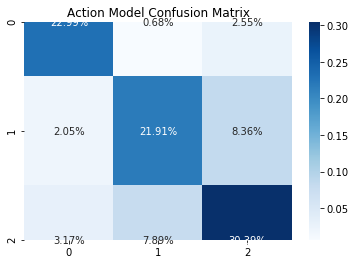

Hand Rank Model Performance
Accuracy= 0.4638857142857143
Error= 0.5361142857142858
              precision    recall  f1-score   support

   High Card       0.78      0.71      0.74      2550
        Pair       0.31      0.20      0.24      2466
    Two Pair       0.37      0.17      0.23      2534
       Trips       0.33      0.41      0.37      2543
    Straight       0.44      0.52      0.48      2512
  Full House       0.49      0.55      0.51      2430
        Nuts       0.48      0.69      0.57      2465

    accuracy                           0.46     17500
   macro avg       0.46      0.46      0.45     17500
weighted avg       0.46      0.46      0.45     17500



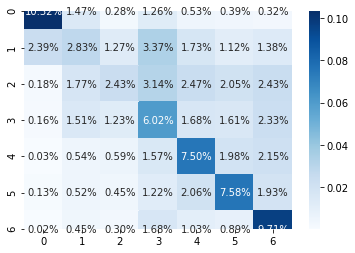

In [47]:
accuracy = grid_search_action_rf.score(X_test_action, y_test_action)
predictions_rf_a = grid_search_action_rf.predict(X_test_action)
error = 1-accuracy
print('Action Model Performance')
print("Accuracy=",accuracy)
print("Error=",error)
print(classification_report(y_test_action, predictions_rf_a, target_names=['fold', 'check', 'raise']))

confusion_action = confusion_matrix(y_test_action, predictions_rf_a)
sns.heatmap(confusion_action/np.sum(confusion_action), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Action Model Confusion Matrix')
plt.show()

accuracy = grid_search_hand_rank_rf.score(X_test_hand_rank, y_test_hand_rank)
predictions_rf_h = grid_search_hand_rank_rf.predict(X_test_hand_rank)
error = 1-accuracy
print('Hand Rank Model Performance')
print("Accuracy=",accuracy)
print("Error=",error)
print(classification_report(y_test_hand_rank, predictions_rf_h, target_names=['High Card', 'Pair', 'Two Pair', 'Trips', 'Straight', 'Full House', 'Nuts']))

confusion_hand_rank = confusion_matrix(y_test_hand_rank, predictions_rf_h)
sns.heatmap(confusion_hand_rank/np.sum(confusion_hand_rank), annot=True, 
            fmt='.2%', cmap='Blues')


In [50]:
param_grid = {
    'max_depth': [1, 3, 5, 10, None],
    'n_estimators': [10, 20, 50, 100]
}

action_model_et = ExtraTreesClassifier()
hand_rank_model_et = ExtraTreesClassifier()

grid_search_action_et_a = GridSearchCV(action_model_et, param_grid)
grid_search_hand_rank_et_h = GridSearchCV(hand_rank_model_et, param_grid)

grid_search_action_et_a.fit(X_train_action, y_train_action)
grid_search_hand_rank_et_h.fit(X_train_hand_rank, y_train_hand_rank)


/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 

Action Model Performance
Accuracy= 0.7413142857142857
Error= 0.2586857142857143
              precision    recall  f1-score   support

        fold       0.80      0.86      0.83      4590
       check       0.70      0.66      0.68      5657
       raise       0.73      0.72      0.72      7253

    accuracy                           0.74     17500
   macro avg       0.74      0.75      0.75     17500
weighted avg       0.74      0.74      0.74     17500



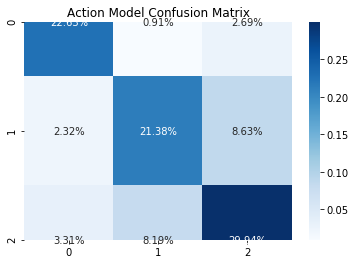

Hand Rank Model Performance
Accuracy= 0.46022857142857143
Error= 0.5397714285714286
              precision    recall  f1-score   support

   High Card       0.77      0.71      0.74      2550
        Pair       0.29      0.23      0.26      2466
    Two Pair       0.36      0.19      0.24      2534
       Trips       0.33      0.37      0.35      2543
    Straight       0.44      0.52      0.47      2512
  Full House       0.49      0.53      0.51      2430
        Nuts       0.48      0.69      0.57      2465

    accuracy                           0.46     17500
   macro avg       0.45      0.46      0.45     17500
weighted avg       0.45      0.46      0.45     17500



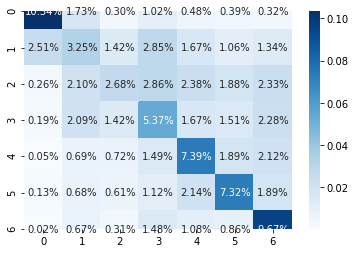

In [51]:
predictions_et_a = grid_search_action_et.predict(X_test_action)
accuracy = grid_search_action_et_a.score(X_test_action, y_test_action)
error = 1-accuracy
print('Action Model Performance')
print("Accuracy=",accuracy)
print("Error=",error)
print(classification_report(y_test_action, predictions_et_a, target_names=['fold', 'check', 'raise']))

confusion_action = confusion_matrix(y_test_action, predictions_et_a)
sns.heatmap(confusion_action/np.sum(confusion_action), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Action Model Confusion Matrix')
plt.show()

predictions_et_h = grid_search_hand_rank_et_h.predict(X_test_hand_rank)
accuracy = grid_search_hand_rank_et_h.score(X_test_hand_rank, y_test_hand_rank)
error = 1-accuracy
print('Hand Rank Model Performance')
print("Accuracy=",accuracy)
print("Error=",error)
print(classification_report(y_test_hand_rank, predictions_et_h, target_names=['High Card', 'Pair', 'Two Pair', 'Trips', 'Straight', 'Full House', 'Nuts']))

confusion_hand_rank = confusion_matrix(y_test_hand_rank, predictions_et_h)
sns.heatmap(confusion_hand_rank/np.sum(confusion_hand_rank), annot=True, 
            fmt='.2%', cmap='Blues')
